In [6]:
import tensorflow as tf
import tensorflow.keras as keras

keras.utils.set_random_seed(42)

In [7]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

In [8]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [9]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [10]:
word_index = imdb.get_word_index()
reverse_word_index = {index: word for word, index in word_index.items()}
def decode_review(sequence):
  return ' '.join([reverse_word_index.get(index - 3, '?') for index in sequence if index > 2])
print(decode_review(train_input[0]))

this film was just story direction really the part they played and you could just being there is an amazing actor and now the same being director father came from the same as so i loved the fact there was a real with this film the throughout the film were great it was just so much that i the film as as it was for and would recommend it to everyone to watch and the was amazing really at the end it was so and you know what they say if you at a film it must have been good and this definitely was also to the two little that played the of and they were just children are often left out of the i think because the stars that play them all up are such a big for the whole film but these children are amazing and should be for what they have done don't you think the whole story was so because it was true and was life after all that was with us all


In [11]:
for i in range(5):
  print(len(train_input[i]))

218
189
141
550
147


In [12]:
for i in range(5):
  print(train_target[i])

1
0
0
1
0


In [13]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [14]:
import numpy as np

lengths = np.array([len(x) for x in train_input])
print(lengths)

[259 520 290 ... 300  70  77]


In [15]:
print(np.mean(lengths), np.median(lengths), np.max(lengths))

239.00925 178.0 1854


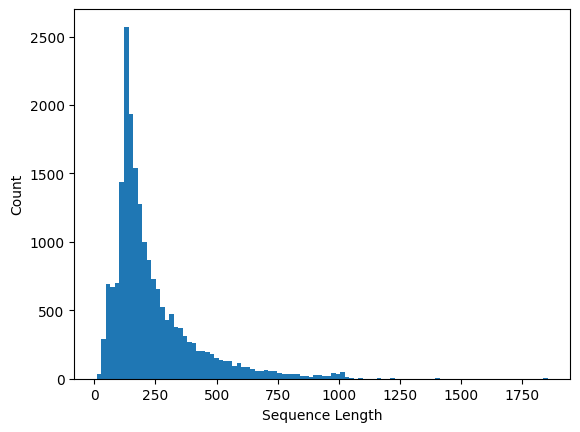

In [16]:
import matplotlib.pyplot as plt

plt.hist(lengths, bins=100)
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.show()

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

In [18]:
print(train_seq.shape)

(20000, 100)


In [19]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [20]:
print(decode_review(train_input[0]))
print(decode_review(train_seq[0]))

well how do you even a movie such as this one does it even have really it's a movie that tries to get as close to being a movie as the entire movie is a of guys a young girl not very and on top of that also not that really br br it's that the movie to be as and as however the movie is just all too for that to work out as the and is all and looking as well as they are often just into the rather than into the girl also the way the girl to all the is pretty i mean if this was real she would had it out there is more than in this one though br br the movie is low budget and it's a at trying to something and as well as original and with very don't really think this movie made much though at the time it got though it must had done something well since a of got after this one br br fans of and will most be by this movie though there are still some people out there who will get a out of this movie br br 4 10
br the movie is low budget and it's a at trying to something and as well as original an

In [21]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [22]:
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 200)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

2025-06-16 16:56:45.108971: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/yjh/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


: 

In [ ]:
train_oh = keras.utils.to_categorical(train_seq)

In [ ]:
print(train_oh.shape)

In [ ]:
val_oh = keras.utils.to_categorical(val_seq)

In [ ]:
model.summary()

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
ckeckpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
earlystopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[ckeckpoint_cb, earlystopping_cb])
     

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

In [ ]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model2.summary()

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
ckeckpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
earlystopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[ckeckpoint_cb, earlystopping_cb])
     

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()